In [17]:
from statsmodels.tsa.vector_ar.var_model import VAR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller


CURR_DIR_PATH = os.getcwd()
FILE_PATH = CURR_DIR_PATH + '/data/'

emission_df = pd.read_csv(f'{FILE_PATH}transformed_finland_data/finland_regions_emissions.csv')
emission_df = emission_df[emission_df['Year'] > 2010]
emission_df['Year'] = pd.to_datetime(emission_df['Year'], format='%Y')

emission_df

,Year,Region,Population,Waste And Sewage,Machinery,Electricity And District Heating,Other Heating,Agriculture,Transportation,Industry,Total Emissions
3,2015-01-01,Central Finland,273446.0,86.3,144.3,413.1,215.3,266.2,516.6,44.0,1748.3
4,2016-01-01,Central Finland,273910.0,78.6,138.3,445.1,235.7,265.2,570.8,37.1,1830.3
5,2017-01-01,Central Finland,273779.0,73.4,156.0,391.3,214.3,258.6,545.9,38.6,1734.4
6,2018-01-01,Central Finland,273283.0,81.1,138.5,443.7,208.6,258.5,552.0,31.8,1766.8
7,2019-01-01,Central Finland,272898.0,77.6,152.5,404.8,190.4,263.8,524.7,27.4,1690.9
...,...,...,...,...,...,...,...,...,...,...,...
204,2018-01-01,Aaland,29789.0,9.5,8.6,31.4,31.2,42.2,108.6,3.2,242.9
205,2019-01-01,Aaland,29884.0,9.3,9.3,28.1,27.6,41.6,107.2,2.7,233.6
206,2020-01-01,Aaland,30129.0,8.9,9.2,17.1,24.5,42.3,84.7,2.8,196.8
207,2021-01-01,Aaland,30344.0,8.4,7.9,24.3,26.0,41.6,75.8,2.2,192.9


In [18]:
# pivot df to have regions as columns and years as index
emission_pivot = emission_df.pivot(index='Year', columns='Region', values='Total Emissions')
emission_pivot

Region,Aaland,Central Finland,Central Ostrobothnia,Kainuu,Kanta-Haeme,Kymenlaakso,Lapland,North Karelia,North Ostrobothnia,North Savo,Ostrobothnia,Paeijaet-Haeme,Pirkanmaa,Satakunta,South Karelia,South Ostrobothnia,South Savo,Southwest Finland,Uusimaa
Year,,,,,,,,,,,,,,,,,,,
2015-01-01,241.2,1748.3,814.6,597.4,1140.1,1177.7,1693.7,1277.2,3341.8,2075.0,1548.0,1363.1,2934.1,1648.2,881.5,2367.1,1051.3,3089.0,7484.6
2016-01-01,252.1,1830.3,844.1,637.4,1193.8,1237.3,1757.6,1328.5,3470.7,2132.3,1604.2,1422.1,3097.5,1740.7,897.8,2457.9,1098.1,3250.9,8182.8
2017-01-01,240.2,1734.4,807.3,628.1,1149.1,1144.7,1702.0,1253.4,3347.5,2019.5,1527.0,1364.8,2921.0,1658.6,831.0,2357.8,1038.7,3101.8,7835.2
2018-01-01,242.9,1766.8,807.8,633.5,1155.4,1156.9,1704.2,1259.1,3381.3,2059.3,1555.4,1389.0,2939.5,1667.3,859.7,2378.5,1044.9,3050.3,7864.8
2019-01-01,233.6,1690.9,792.5,628.5,1099.8,1112.0,1662.5,1187.8,3340.7,1959.7,1509.6,1234.6,2814.4,1593.9,801.3,2348.4,994.0,2792.2,7365.9
2020-01-01,196.8,1558.8,745.8,592.6,996.8,996.6,1545.6,1114.1,3135.9,1879.0,1358.6,1057.8,2622.5,1453.6,733.6,2215.4,934.8,2466.1,6438.8
2021-01-01,192.9,1512.5,729.6,573.1,967.5,1011.8,1466.4,1089.3,3050.1,1825.4,1383.0,1044.1,2620.4,1415.3,724.5,2162.3,927.8,2549.7,6586.2
2022-01-01,181.8,1404.5,697.7,575.4,933.0,980.0,1402.6,1017.7,2825.0,1731.4,1293.3,985.4,2490.8,1341.4,680.9,2057.6,864.1,2424.7,6589.9


In [19]:
emission_pivot_log = np.log(emission_pivot) # np.log to reduce range of data and stabilize variance
emission_pivot_log

Region,Aaland,Central Finland,Central Ostrobothnia,Kainuu,Kanta-Haeme,Kymenlaakso,Lapland,North Karelia,North Ostrobothnia,North Savo,Ostrobothnia,Paeijaet-Haeme,Pirkanmaa,Satakunta,South Karelia,South Ostrobothnia,South Savo,Southwest Finland,Uusimaa
Year,,,,,,,,,,,,,,,,,,,
2015-01-01,5.485626,7.466399,6.702697,6.392587,7.038871,7.071319,7.434671,7.152425,8.114265,7.637716,7.344719,7.217517,7.984156,7.407439,6.781625,7.769421,6.957783,8.035603,8.920603
2016-01-01,5.529826,7.512235,6.738271,6.457397,7.084897,7.120687,7.471705,7.191806,8.152112,7.664956,7.380380,7.259890,8.038351,7.462043,6.799947,7.807063,7.001337,8.086687,9.009790
2017-01-01,5.481472,7.458417,6.693695,6.442699,7.046734,7.042898,7.439559,7.133615,8.115969,7.610605,7.331060,7.218763,7.979681,7.413729,6.722630,7.765484,6.945725,8.039738,8.966382
2018-01-01,5.492650,7.476925,6.694315,6.451260,7.052202,7.053499,7.440851,7.138152,8.126016,7.630121,7.349488,7.236339,7.985995,7.418961,6.756583,7.774225,6.951676,8.022995,8.970152
2019-01-01,5.453610,7.433016,6.675193,6.443336,7.002884,7.013915,7.416078,7.079858,8.113936,7.580547,7.319600,7.118502,7.942504,7.373939,6.686235,7.761490,6.901737,7.934585,8.904617
2020-01-01,5.282188,7.351672,6.614457,6.384520,6.904550,6.904349,7.343167,7.015802,8.050671,7.538495,7.214210,6.963947,7.871883,7.281799,6.597964,7.703188,6.840333,7.810393,8.770097
2021-01-01,5.262172,7.321519,6.592496,6.351060,6.874715,6.919486,7.290566,6.993291,8.022930,7.509554,7.232010,6.950911,7.871082,7.255097,6.585482,7.678928,6.832816,7.843731,8.792732
2022-01-01,5.202907,7.247437,6.547789,6.355065,6.838405,6.887553,7.246083,6.925300,7.946264,7.456686,7.164952,6.893048,7.820359,7.201469,6.523415,7.629296,6.761689,7.793463,8.793293


In [20]:
# do .diff() to make data stationary (e.g. mean doesnt't change along time series). 
emission_pivot_diff = emission_pivot_log.diff().dropna() # calcs difference between each element and the previous, need dropna because a NaN is introduced as first entry has no prev entry
emission_pivot_diff

Region,Aaland,Central Finland,Central Ostrobothnia,Kainuu,Kanta-Haeme,Kymenlaakso,Lapland,North Karelia,North Ostrobothnia,North Savo,Ostrobothnia,Paeijaet-Haeme,Pirkanmaa,Satakunta,South Karelia,South Ostrobothnia,South Savo,Southwest Finland,Uusimaa
Year,,,,,,,,,,,,,,,,,,,
2016-01-01,0.044199,0.045836,0.035574,0.064810,0.046026,0.049368,0.037034,0.039380,0.037847,0.027240,0.035661,0.042373,0.054195,0.054604,0.018322,0.037642,0.043554,0.051084,0.089187
2017-01-01,-0.048354,-0.053818,-0.044576,-0.014698,-0.038162,-0.077789,-0.032145,-0.058191,-0.036143,-0.054351,-0.049320,-0.041127,-0.058669,-0.048313,-0.077318,-0.041578,-0.055611,-0.046949,-0.043408
2018-01-01,0.011178,0.018508,0.000619,0.008561,0.005468,0.010601,0.001292,0.004537,0.010046,0.019516,0.018428,0.017576,0.006313,0.005232,0.033954,0.008741,0.005951,-0.016743,0.003771
2019-01-01,-0.039040,-0.043909,-0.019122,-0.007924,-0.049318,-0.039584,-0.024773,-0.058294,-0.012080,-0.049575,-0.029888,-0.117837,-0.043490,-0.045022,-0.070348,-0.012736,-0.049939,-0.088410,-0.065536
2020-01-01,-0.171422,-0.081345,-0.060735,-0.058816,-0.098333,-0.109566,-0.072910,-0.064056,-0.063264,-0.042052,-0.105390,-0.154556,-0.070621,-0.092141,-0.088271,-0.058301,-0.061405,-0.124192,-0.134519
2021-01-01,-0.020016,-0.030152,-0.021961,-0.033459,-0.029835,0.015137,-0.052602,-0.022512,-0.027742,-0.028941,0.017800,-0.013036,-0.000801,-0.026702,-0.012482,-0.024261,-0.007516,0.033338,0.022634
2022-01-01,-0.059265,-0.074083,-0.044707,0.004005,-0.036310,-0.031934,-0.044483,-0.067990,-0.076666,-0.052869,-0.067058,-0.057863,-0.050723,-0.053628,-0.062066,-0.049632,-0.071128,-0.050268,0.000562


In [21]:
model = VAR(emission_pivot_diff)
model_fit = model.fit()

forecast_steps = 3 # steps = number of years to forecast
lag_order = model_fit.k_ar # retrieve optimal lag_order (= amount of previous steps used in model) from model_fit

forecast_input = emission_pivot_diff.values[-lag_order:] # conv to np array, slice last lag_order to use when forecasting. If lag_order = 3, returns array with 3 nested arrays with 19 entries(each region)
forecast_diff = model_fit.forecast(y=forecast_input, steps=forecast_steps) # returns array with nested array of forecasted data for each step, predictions also in diffferences 
forecast_diff


c:\repos\graduationa_project_carbon_calculator\graduation_venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


array([[-0.0152929 , -0.00870257, -0.01854393,  0.00249575, -0.00341778,
        -0.00405355, -0.01740064, -0.01116223, -0.023715  ,  0.00341823,
        -0.00869815,  0.02072908, -0.00829956, -0.01146824,  0.01422731,
        -0.01585917, -0.01242696, -0.00881255,  0.0141373 ],
       [ 0.02223115, -0.01231846, -0.00359026,  0.01515976, -0.00746548,
         0.00756055, -0.00496529, -0.03116541, -0.00056147, -0.02490638,
         0.01045076, -0.03078086, -0.0137062 , -0.0101806 , -0.0184941 ,
         0.00183253, -0.02528284, -0.02987703,  0.00464628],
       [-0.12629044, -0.06627875, -0.04632413, -0.02856568, -0.07574041,
        -0.09398549, -0.04574849, -0.0636598 , -0.04664489, -0.0393566 ,
        -0.09206164, -0.14070243, -0.06751117, -0.07414004, -0.08087293,
        -0.04114286, -0.06427386, -0.13173529, -0.11665664]])

In [22]:
# create range of future years, length matching steps
forecast_index = pd.date_range(
    # start at last known data point, starts forecast at start + 1 year and predicts three years
    start=emission_pivot.index[-1] + pd.DateOffset(years=1), periods=forecast_steps, freq='YS') # YS = year start, start of year as frequency (yyyy-01-01)

# create a forecast df (three rows, matching steps): use prev range as index, forecast_diff as values and get column names from emission_pivot (need to be identical for later)
forecast_diff_df = pd.DataFrame(
    forecast_diff, index=forecast_index, columns=emission_pivot.columns)
forecast_diff_df 

Region,Aaland,Central Finland,Central Ostrobothnia,Kainuu,Kanta-Haeme,Kymenlaakso,Lapland,North Karelia,North Ostrobothnia,North Savo,Ostrobothnia,Paeijaet-Haeme,Pirkanmaa,Satakunta,South Karelia,South Ostrobothnia,South Savo,Southwest Finland,Uusimaa
2023-01-01,-0.015293,-0.008703,-0.018544,0.002496,-0.003418,-0.004054,-0.017401,-0.011162,-0.023715,0.003418,-0.008698,0.020729,-0.008300,-0.011468,0.014227,-0.015859,-0.012427,-0.008813,0.014137
2024-01-01,0.022231,-0.012318,-0.003590,0.015160,-0.007465,0.007561,-0.004965,-0.031165,-0.000561,-0.024906,0.010451,-0.030781,-0.013706,-0.010181,-0.018494,0.001833,-0.025283,-0.029877,0.004646
2025-01-01,-0.126290,-0.066279,-0.046324,-0.028566,-0.075740,-0.093985,-0.045748,-0.063660,-0.046645,-0.039357,-0.092062,-0.140702,-0.067511,-0.074140,-0.080873,-0.041143,-0.064274,-0.131735,-0.116657


In [23]:
# conv forecast back to original scale 
last_log_values = emission_pivot_log.iloc[-1]
forecast_log_original = last_log_values + forecast_diff_df.cumsum() # cumulative sum of forecast diff values, basically undo the diff
forecast_original = np.exp(forecast_log_original) # "undo" the log operation

# append forecast data (now in original scale) to historical data
combined_series = pd.concat([emission_pivot, forecast_original])
print(combined_series)



Region          Aaland  Central Finland  Central Ostrobothnia      Kainuu  \
2015-01-01  241.200000      1748.300000            814.600000  597.400000   
2016-01-01  252.100000      1830.300000            844.100000  637.400000   
2017-01-01  240.200000      1734.400000            807.300000  628.100000   
2018-01-01  242.900000      1766.800000            807.800000  633.500000   
2019-01-01  233.600000      1690.900000            792.500000  628.500000   
2020-01-01  196.800000      1558.800000            745.800000  592.600000   
2021-01-01  192.900000      1512.500000            729.600000  573.100000   
2022-01-01  181.800000      1404.500000            697.700000  575.400000   
2023-01-01  179.040902      1392.330276            684.881126  576.837849   
2024-01-01  183.065760      1375.284117            682.426637  585.649191   
2025-01-01  161.346624      1287.087082            651.534856  569.156410   

Region      Kanta-Haeme  Kymenlaakso      Lapland  North Karelia  \
2015-01

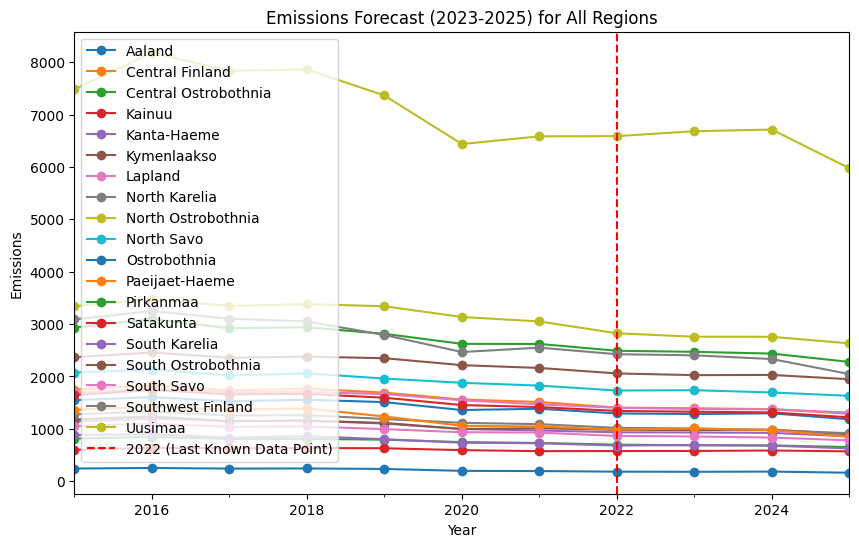

In [24]:
combined_series.plot(figsize=(10, 6), marker='o')
plt.axvline(x=emission_pivot.index[-1], color='red',
            linestyle='--', label='2022 (Last Known Data Point)') #vertical line to mark split between historical/forecast data
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.title('Emissions Forecast (2023-2025) for All Regions')
plt.legend()
plt.show()